In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

In [3]:
def make_output(source_file, output_file, num_of_processes, num_of_versions):
    for v in range(num_of_versions):
        if subprocess.call([f"truncate -s 0 {output_file}{v+1}"], shell=True):
            print("Something went wrong") 
        for i in range(num_of_processes):
            if subprocess.call(["gcc", "-fopenmp", source_file + str(v+1) + ".c", "-lm"]) == 0:
                subprocess.call([f"OMP_NUM_THREADS={i+1} ./a.out {N} {T} >> {output_file}{v+1}"], shell=True)
            else:
                print("Compilation errors")

In [11]:
def plot(output_file, num_of_versions):
    for v in range(num_of_versions):
        df = pd.read_csv(output_file + str(v+1), header=None, delimiter = "\t", names=(['Time, sec']))
        df['Acceleration'] = df['Time, sec'][0] / df['Time, sec']
        df['Processes'] = range(1, 9)
        plt.figure(figsize=(14, 10))
        plt.xlabel('Processes', fontsize=20)
        plt.ylabel('Acceleration', fontsize=20)
        plt.grid(True)
        plt.title('', fontsize=20)
        plt.plot(df['Processes'], df['Acceleration'], 'ob-', label=f'Acceleration {v+1}')
        plt.legend(fontsize=20, loc='best')
        plt.savefig(f'Acceleration{v+1}.jpg')
        #plt.show()

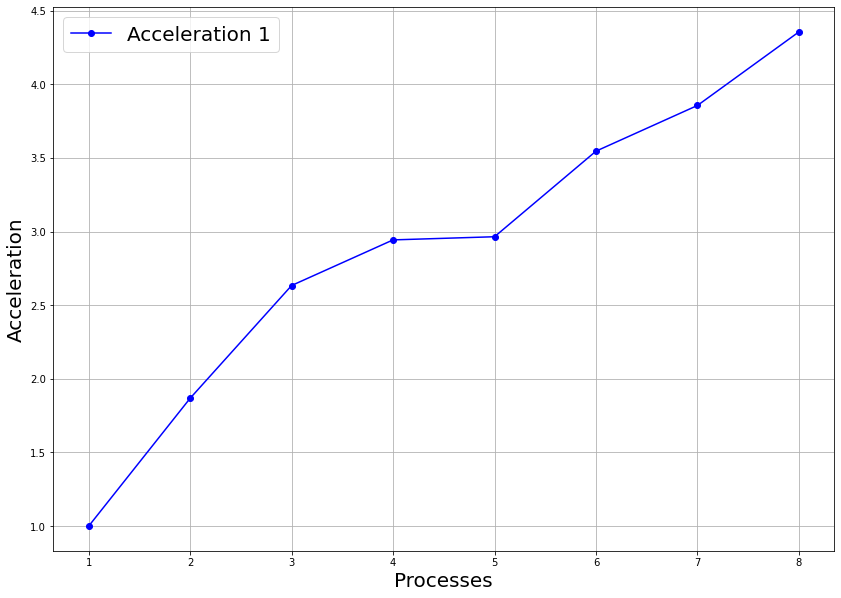

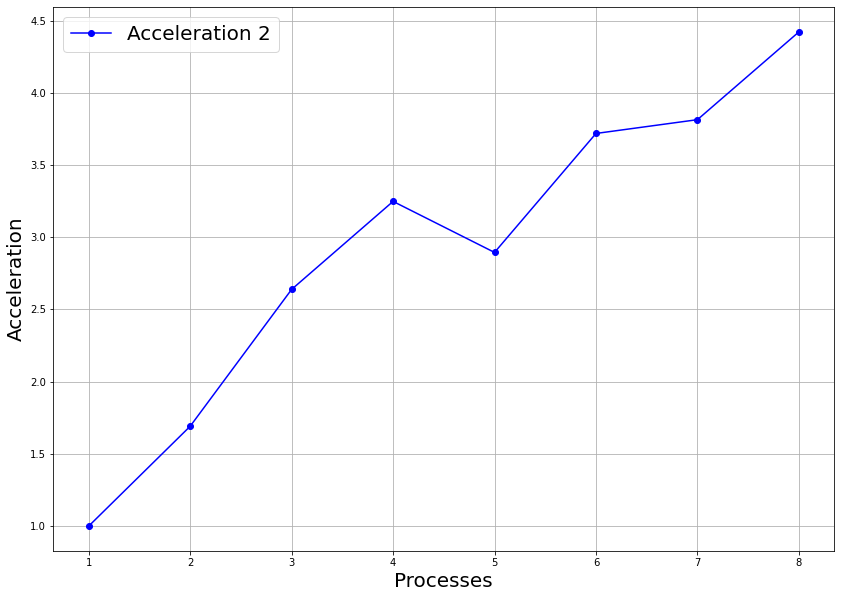

In [18]:
source_file = "main"
output_file = "result"
N = 100000000
T = 10e-9
num_of_processes = 8
num_of_versions = 2
make_output(source_file, output_file, num_of_processes, num_of_versions)
plot(output_file, num_of_versions)